# Assignment 1, Eric Johansson & Max Sonnelid

# Introduction

#### This assignment aims to develop knowledge about about the workflow of machine learning in Python, decision tree learning algorithms for classification and regression as well as understanding what overfitting and underfitting is. This project has been executed by Eric Johansson and Max Sonnelid.
In this exercise, we'll use a dataset of fetal heart diagnosis. The dataset contains measurements from about 2,600 fetuses. This is a classification task, where our task is to predict a diagnosis type following the FIGO Intrapartum Fetal Monitoring Guidelines: normal, suspicious, or pathological.

# Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Loading the data


In [2]:
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv("CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

### Explanation of the variables above

In [3]:
#LB - FHR baseline (beats per minute) 
#AC - # of accelerations per second 
#FM - # of fetal movements per second 
#UC - # of uterine contractions per second 
#DL - # of light decelerations per second 
#DS - # of severe decelerations per second 
#DP - # of prolongued decelerations per second 
#ASTV - percentage of time with abnormal short term variability 
#MSTV - mean value of short term variability 
#ALTV - percentage of time with abnormal long term variability 
#MLTV - mean value of long term variability 
#Width - width of FHR histogram 
#Min - minimum of FHR histogram 
#Max - Maximum of FHR histogram 
#Nmax - # of histogram peaks 
#Nzeros - # of histogram zeros 
#Mode - histogram mode 
#Mean - histogram mean 
#Median - histogram median 
#Variance - histogram variance 
#Tendency - histogram tendency  
#NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

In [4]:
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [5]:
## Initilizing a dummy classifier to achieve a benchmark to compare with

In [6]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')

In [7]:
from sklearn.model_selection import cross_val_score

dummyScore = cross_val_score(clf, Xtrain, Ytrain)
dummyScore.mean()

0.7805882352941176

In [8]:
##Now lets try some more useful classifiers

## Decision Tree Classifier (Tree-based)

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [10]:
## Using cross validation to increase score
from sklearn.model_selection import cross_val_score

decisionTreeScore = cross_val_score(clf, Xtrain, Ytrain, cv=5)
decisionTreeScore.mean()

0.9211764705882353

## Random Forest Classifieer (Tree-based)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
randomForestScore = cross_val_score(rclf, Xtrain, Ytrain, cv=5)
randomForestScore.mean()

0.9400000000000001

## Logistic Regression (linear)

In [12]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear')

logRegScore = cross_val_score(logisticRegr, Xtrain, Ytrain, cv=5)
logRegScore.mean()


0.8929411764705882

## K nearest neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=2 ## Tweak this to get optimal score
knn = KNeighborsClassifier(n_neighbors,weights='distance') 

#knn.fit(Xtrain, Ytrain)

In [14]:
## Used this to get a feeling of what value of neighbors that was the best
#from sklearn.metrics import accuracy_score
#all_predictions = knn.predict(Xtest)
#accuracy_score(Ytest, all_predictions)


In [15]:
knnScore = cross_val_score(knn, Xtrain, Ytrain, cv=5)
knnScore.mean()

0.8947058823529412

## Linear SVC

In [16]:
from sklearn.svm import LinearSVC

lSVC = LinearSVC(max_iter=10000)
lSCVScore = cross_val_score(lSVC, Xtrain, Ytrain, cv=5, scoring='accuracy') ## Why is this increasing when aing scoring='accuracy'? 
lSCVScore.mean()

0.8594117647058823

#### The first task went well without any major issues. After trying out several classifiers, the Random- ForestClassifier turned out to yield the highest accuracy. Hence, the RandomForestClassifier was trained and later tested on the test data. The final accuracy was 0.9307.


#### Since the random forest yielded the highest accuracy, we will use that on the whole training set and then predict on the test-set. 

In [17]:
from sklearn.metrics import accuracy_score
rclf.fit(Xtrain, Ytrain)
all_predictions = rclf.predict(Xtest)
accuracy_score(Ytest, all_predictions)

## The final accuracy was 0.9307

0.9272300469483568

## Short description of the Random Forrest Classifier

#### Since a relatively thorough description of regular decision trees has been given during the lectures, that will not be included here. Instead, only the Random Forrest will be discussed. 

#### The first thing to do when creating a random forrest is to bootstrap the original data set, which is done by choosing random rows from the original data set and adding it to our bootstrapped data set. Same rows can be added multiple times. The next step is to make a decision tree out of the bootstrapped data set. However, in this step only some random variable will be taken into account when creating the node. For example, in the CTG data set LB, AC and FM is only used in the root node and AS, DP and ASTV is used in the second. 
# 
#### These two steps are then repeated multiple times in order to create an entire forest of decision tree - hence the nice name. Since all tree varies in some way, the final accuracy is higher in a random forrest compared to a regular decision tree. To use the random forest, test data is run through all trees and it then outputs the combined result of the trees.

# Task 2 

In [18]:
## Copying tree classifier class from lecture code

## START of imported DecisionTree Class

In [19]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [20]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        

In [21]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [22]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [23]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

## END of imported TreeClassifier class

In [24]:
## Calculating the accuracy score from 5-fold-cross-validation for different max_depths

for i in range(1,16):
    tclf = TreeClassifier(i)
    acc_score = cross_val_score(tclf, Xtrain, Ytrain, cv=5)
    print("For depth:", i)
    print(acc_score.mean())

For depth: 1
0.8317647058823529
For depth: 2
0.8911764705882353
For depth: 3
0.9023529411764706
For depth: 4
0.9105882352941176
For depth: 5
0.9123529411764706
For depth: 6
0.9099999999999999
For depth: 7
0.9105882352941176
For depth: 8
0.9099999999999999
For depth: 9
0.9105882352941176
For depth: 10
0.9099999999999999
For depth: 11
0.9099999999999999
For depth: 12
0.9076470588235294


#### After trying different depths in the range from 1 to 15 for the TreeClassifier and then calculating the 5-fold cross validation accuracy score for each of the depths, a depth of 13 resulted in an accuracy score of 0.914. However, the second-best accuracy score retrieved was 0.912, which was produced from a model with depth 5. A depth of 13 implies a rather complex model with a high risk of overfitting and therefore a high risk that this model is not particularly relevant for the test data. Therefore, it is probably better to choose the simpler model with an almost as good accuracy and we regard a TreeClassifier with a depth of 5 as the model with the best cross-validation performance.

## Drawing tree 

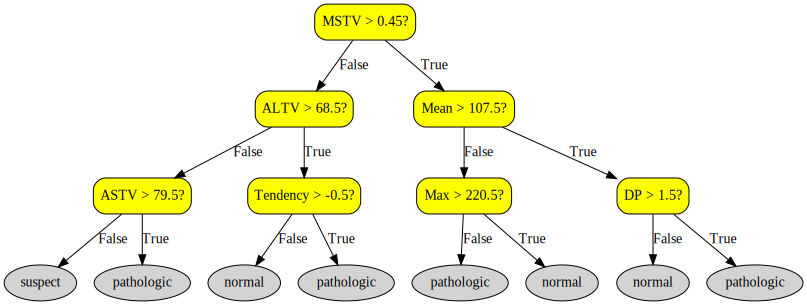

In [27]:
cls = TreeClassifier(max_depth=3)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

# Task 3

In [48]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [29]:
## Dummy regressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00273728, 0.00126171, 0.00092483, 0.00078106, 0.00178623]),
 'score_time': array([0.00026274, 0.00055814, 0.00019312, 0.00018883, 0.00018001]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#reg.fit(Xtrain, Ytrain)
regScore = cross_validate(reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')

In [31]:
## Use this method to access the result and to calculate mean.

class AttributeDict(dict):
    def __getattr__(self, name):
        if name in self:
            return self[name]
        raise AttributeError(name)

In [32]:
result_1 = AttributeDict(regScore)
result_1.keys()
result_1.test_score.mean()

-0.3013986588767175

## Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
rfRegr = RandomForestRegressor(max_depth=2, random_state=0)
#rfRegr.fit(Xtrain, Ytrain)
rfRegrScore = cross_validate(rfRegr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

In [34]:
result_2 = AttributeDict(rfRegrScore)
result_2.keys()
result_2.test_score.mean()

-0.29733581591151304

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtRegr = DecisionTreeRegressor(random_state=0)
dtRegrScore = cross_validate(dtRegr, Xtrain, Ytrain, scoring='neg_mean_squared_error')
result_3 = AttributeDict(dtRegrScore)
result_3.keys()
result_3.test_score.mean()


In [35]:
## Looping through the remaining regressors

In [36]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

regressors = [Ridge(alpha=1.0),linear_model.Lasso(alpha=0.1),GradientBoostingRegressor(random_state=0)]

for regr in regressors:
    score = cross_validate(regr, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    result = AttributeDict(score)
    result.keys()
    print(regr)
    print(result.test_score.mean())
    print()

Ridge()
-0.3013978423217976

Lasso(alpha=0.1)
-0.29817864931315446

GradientBoostingRegressor(random_state=0)
-0.2645501801671458



#### After calculating the mean squared error for different regressors, the Gradient Boosting regressor generated the lowest value for the training data, namely 0.265. Calculating the mean squared error on the test data with the same model gives a value of 0.271.

## Short description of the Gradient Boosting regressor

#### The Gradient Boosting model is a type of ensemble model, consisting mainly of weak models as decision trees, that is based on that the best possible next model is able to minimize the total prediction error if the previous models are also taken into account. This optimizing of the sequentially improved model uses the gradient of the prediction error and each new model follows the negative gradient in order to minimize the total prediction error. The number of models created in the Gradient Boosting model depends on the choice by the user. However, if a model reaches a prediction error of zero, no more models have to be created.


In [37]:
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, gbr.predict(Xtest))

## The score was 0.27136199343052597

0.27136199343052597

# Task 4

## Implementing a new class, called TreeRegressor

In [38]:
def deleteValue(list,value):
    for i in len(list):
        if list[i]==value:
            delete.list(i)
            return list
    return list

In [85]:
from collections import Counter
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth, criterion='variance_reduction'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # Here, variance_reduction is our only option
        if self.criterion == 'variance_reduction':
            self.criterion_function = variance_reduction_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value
    def get_default_value(self, Y):
        return np.mean(Y) ## Returning mean.
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return np.var(Y)<0.1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = []
        high_distr = Y_sorted

        # Keep track of the best result we've seen so far.
        max_score = np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):


            # Input and output at the current position. 
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Instead of using Counter as in the TreeClassifier, we split upp sorted Y in 
            # low and high distr and checking which split generates the lowest variance reduction
            low_distr =  Y_sorted[0:i]    
            high_distr = Y_sorted[i:]    

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the variance reduction for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score < max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


In [40]:
def variance_reduction_scorer(n_low, low_distr, n_high, high_distr): 
    joined_list = [*low_distr, *high_distr]
    return np.var(joined_list)-n_low/(n_low+n_high)*np.var(high_distr)-n_high/(n_low+n_high)*np.var(low_distr)

## Testing our model on the data set

## Sanity check

## Decision tree to describe the data from the data-generating function

#### Looking at the scatter plot, one could spot that there exists two major clusters. The first cluster has an average value of zero and the other one average approximately one. There is a sudden switch of value when F0 (the x-axis) goes above 1. Since there are only two main cluster, the maximum depth is set to one. If another value was set as maximum depth, e.g 3, the model would probably make up clusters within the existing cluster. This would lead to higher accuracy on the training data, but wouldn’t reflect the real function any better. This is a very good example of when the model becomes overfitted.

#### Hence, we would describe the tree as drawn below:

In [105]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://i.postimg.cc/gJx40xh9/DECISIONTREE.jpg")

## Making our own tree based on the data-generating function

In [41]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

-0.12895012108251647


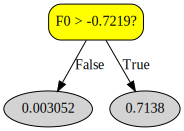

In [84]:
data = make_some_data(1000)

## Splitting the data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[0], data[1], test_size=0.2)
tReg = TreeRegressor(1)
tRegScore = cross_validate(tReg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
results = AttributeDict(tRegScore)
results.keys()
print(results.test_score.mean())

tReg.fit(Xtrain,Ytrain)
tReg.draw_tree()



#### Implementing our TreeRegressor led to -0.1287 in mean squared error. Our proposed tree in figure 1 is thus similar to the one calculated in figure 2. However, the threshold value didn’t turn out exactly as expected. It seems like the value (-0.4372 in our case) is a bit lower than expected. By putting the split a bit low, the mean values in the grey ellipsoids gets a bit too small since some of the values that averages 1 gets classified in the lower part of the tree. One reason why this could be case could be that the threshold that classifies the set as homogeneous (i.e, low enough variance) could be too high and therefore terminates too early. We did, however, try to change this threshold but did not get substantially better results. This would be very interesting to examine further to get a more accurate answer if more time was given.

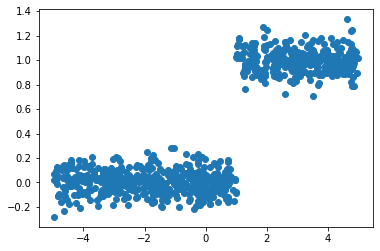

In [43]:
plt.scatter(Xtrain,Ytrain)

## Predicting prices on Russian apartments

### Reading the data once again (to avoid using numbers from make_some_data when executing all cells )

In [87]:
# Read the CSV file using Pandas.
alldata = pd.read_csv("sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

## Over- and underfitting

In [53]:
train_score = np.array([])
test_score = np.array([])

for i in range(20):
    cls = TreeRegressor(i)
    cls.fit(Xtrain, Ytrain)
    train_score = np.append(train_score, mean_squared_error(Ytrain, cls.predict(Xtrain)))
    test_score = np.append(test_score,  mean_squared_error(Ytest, cls.predict(Xtest)))



print("Train Score: ")
print(train_score)
print("Test Score: ")
print(test_score)

Train Score: 
[0.38914686 0.38820711 0.38691596 0.38670991 0.38480867 0.38247796
 0.37933278 0.36536315 0.34842395 0.32217197 0.30760833 0.29364758
 0.27454176 0.25296792 0.23347605 0.21115462 0.19070244 0.171652
 0.15230141 0.13675802]
Test Score: 
[0.40283984 0.40226878 0.40107315 0.40124541 0.39984996 0.39633795
 0.39226313 0.38152635 0.36663438 0.35087803 0.34363226 0.34273747
 0.35115303 0.34908339 0.35600682 0.36950358 0.3778891  0.37712271
 0.38532368 0.39190576]


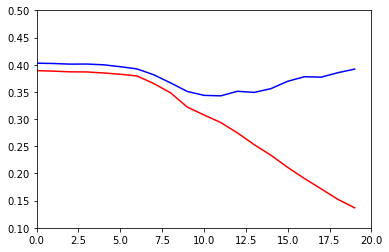

In [57]:
plt.xlim(0, 20)
plt.ylim(0.1, 0.5)
plt.plot(train_score, 'r') # plotting t, a separately 
plt.plot(test_score, 'b') # plotting t, b separately 
plt.show()

#### To set the right value of max depth, we first run through different depths, both for the train- and test data in order to discover when the data becomes overfitted. According to the plot (which can be seen above) the optimal depth were around eight. By setting the depth to eight and training the model on the Russian housing data, the final score became 0.36692

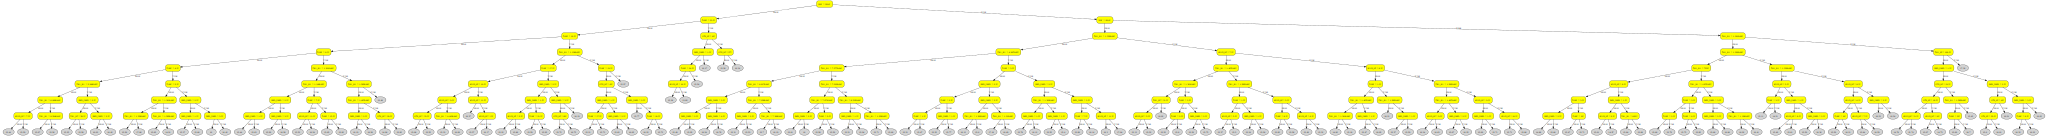

In [88]:
cls = TreeRegressor(8)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

In [89]:
mean_squared_error(Ytest, cls.predict(Xtest))


0.36692849578147324

#### Looking at the graph, one can see that the model always performs better on the training data. What is interesting is that the ”training-prediction” becomes increasingly better as the depth grows bigger. However, a max depth beyond eight makes the prediction of the testing data worse and worse. This is since the model becomes to ”custom-fit” to the training data, i.e very biased. Therefore, setting a maximum depth higher than eight would not be beneficial if the model were to predict outcomes on any similar data set expect from the training set.